In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

### Load the data

In [2]:
stat_penguins = pd.read_csv('penguins.csv')
penguins_df = stat_penguins

In [3]:
penguins_df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

#### Drop rows with missing values

In [4]:
penguins_df.dropna(inplace=True)

In [5]:
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [6]:
label_encoder = LabelEncoder()
penguins_df['sex_encoded'] = label_encoder.fit_transform(penguins_df['sex'])

penguins_df.drop(columns=['sex'], inplace=True)

for col in penguins_df.columns:
    penguins_df[col] = pd.to_numeric(penguins_df[col], errors='coerce')

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex_encoded            int32
dtype: object


In [7]:
print(penguins_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex_encoded        332 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 11.8 KB
None


#### Select the features for clustering

In [8]:
features = penguins_df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

#### Standardize the features

In [9]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#### Apply K-Means clustering

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [11]:
penguins_df['Cluster'] = clusters

### Visualize the clusters

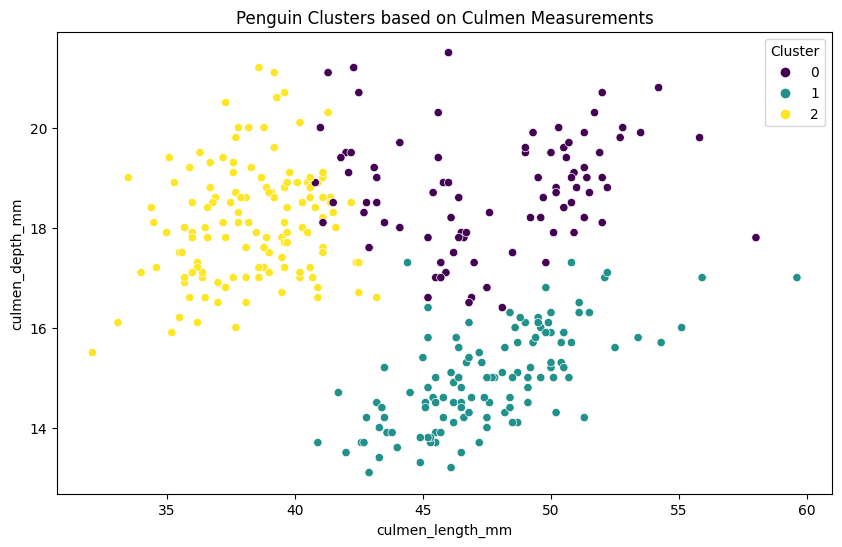

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=penguins_df, x='culmen_length_mm', y='culmen_depth_mm', hue='Cluster', palette='viridis')
plt.title('Penguin Clusters based on Culmen Measurements')
plt.show()

# ADDITIONAL

## Improvement

#### Elbow Method

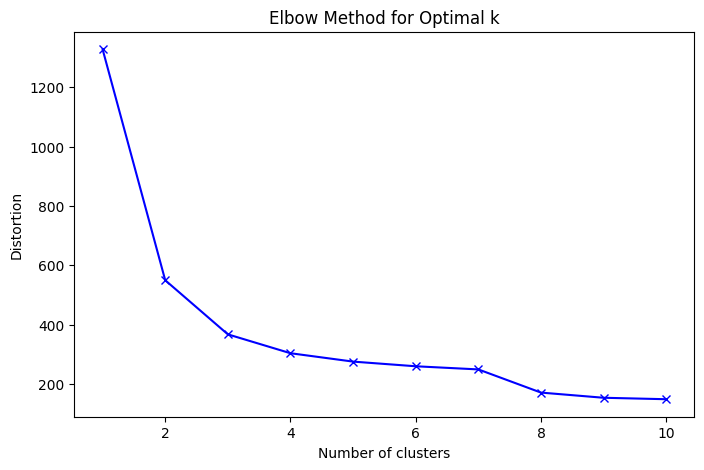

In [13]:
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

#### Silhouette Score

In [14]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.447862335700844


### Pairplot: 
#### To visualize the relationship between different features and clusters

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

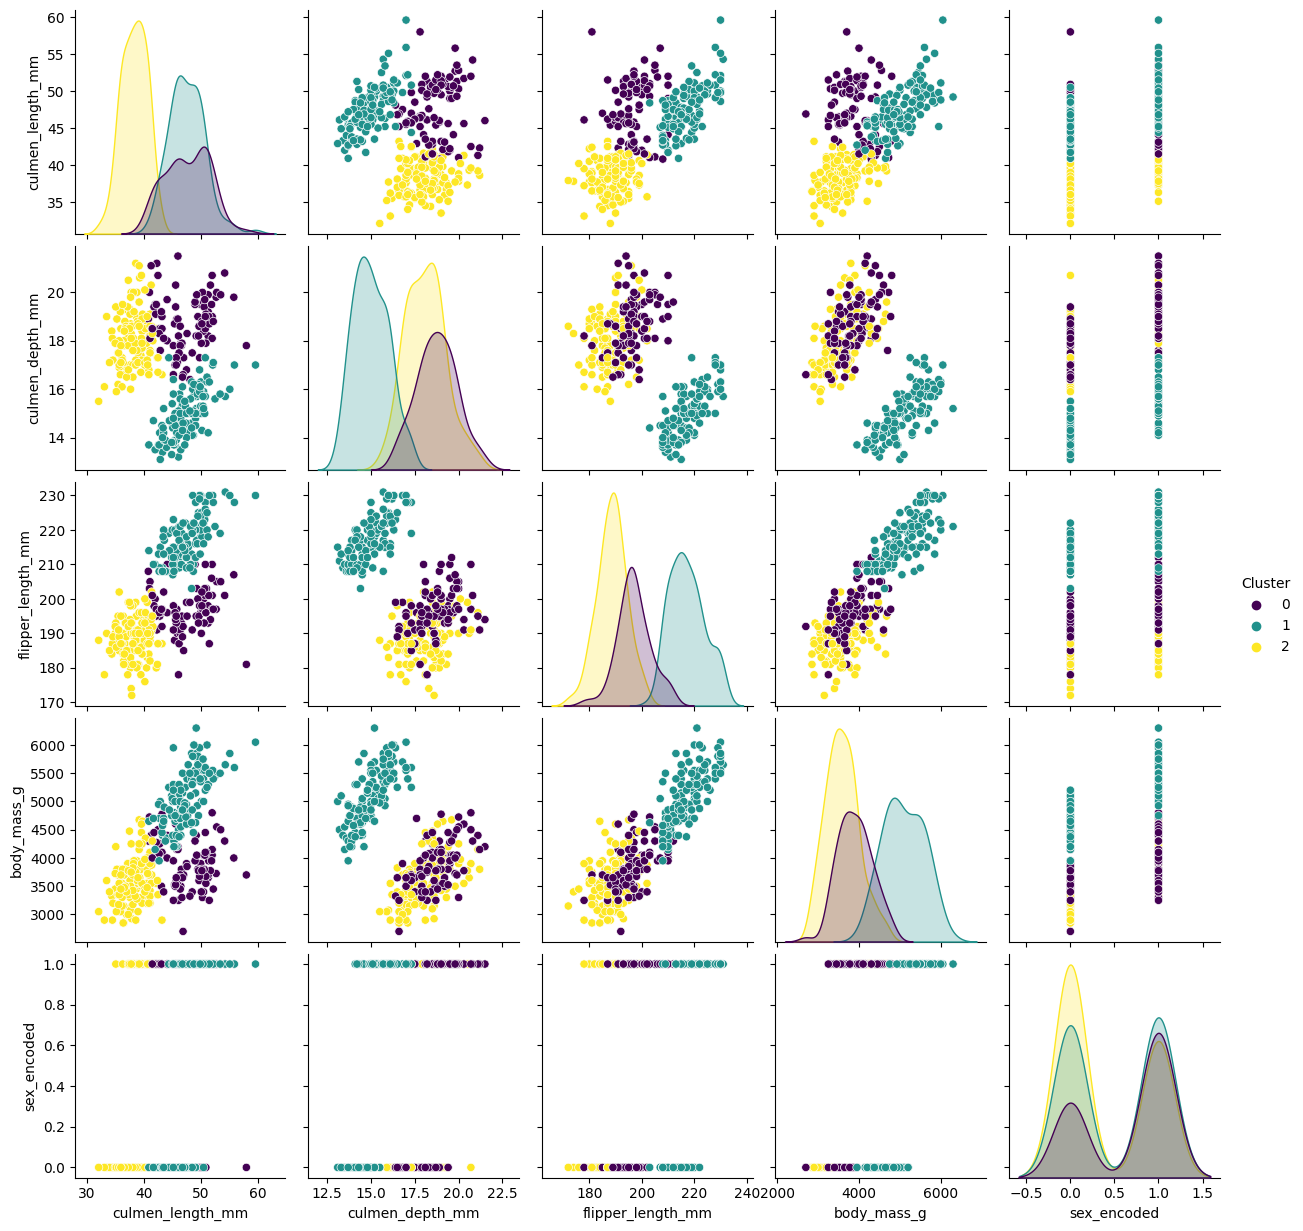

In [15]:
sns.pairplot(penguins_df, hue='Cluster', palette='viridis')
plt.show()